### **Importing necessary libraries**

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

### **Importing the data**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/ML_Project/merged_usa_dataset.csv")
df.head()

,Entity,Year,Renewables (% electricity),Renewables (% equivalent primary energy),Biofuels Production - TWh - Total,Solar (% electricity),Hydro (% equivalent primary energy),Electricity from hydro (TWh),Electricity from wind (TWh),Hydro (% electricity),...,Electricity from solar (TWh),Other renewables including bioenergy (TWh),Geo Biomass Other - TWh,Solar Generation - TWh,Wind Generation - TWh,Hydro Generation - TWh,Geothermal Capacity,Wind (% equivalent primary energy),Wind Capacity,Solar (% equivalent primary energy)
0,United States,1965,0.0,4.368870,0.0,0.0,4.074629,397.94818,0.0,0.0,...,0.0,13.332232,13.332232,0.0,0.0,198.97409,0.0,0.0,0.0,0.0
1,United States,1966,0.0,4.171402,0.0,0.0,3.877466,399.87380,0.0,0.0,...,0.0,14.062007,14.062007,0.0,0.0,199.93690,0.0,0.0,0.0,0.0
2,United States,1967,0.0,4.542216,0.0,0.0,4.258249,454.44162,0.0,0.0,...,0.0,14.073571,14.073571,0.0,0.0,227.22081,0.0,0.0,0.0,0.0
3,United States,1968,0.0,4.330974,0.0,0.0,4.035142,456.30942,0.0,0.0,...,0.0,15.546045,15.546045,0.0,0.0,228.15471,0.0,0.0,0.0,0.0
4,United States,1969,0.0,4.598878,0.0,0.0,4.305610,512.05706,0.0,0.0,...,0.0,16.227060,16.227060,0.0,0.0,256.02853,0.0,0.0,0.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 22 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Entity                                      57 non-null     object 
 1   Year                                        57 non-null     int64  
 2   Renewables (% electricity)                  57 non-null     float64
 3   Renewables (% equivalent primary energy)    57 non-null     float64
 4   Biofuels Production - TWh - Total           57 non-null     float64
 5   Solar (% electricity)                       57 non-null     float64
 6   Hydro (% equivalent primary energy)         57 non-null     float64
 7   Electricity from hydro (TWh)                57 non-null     float64
 8   Electricity from wind (TWh)                 57 non-null     float64
 9   Hydro (% electricity)                       57 non-null     float64
 10  Wind (% electric

### **Data Preparation:**

##### **Dropping the Entity column as it's all United States and it isn't really required to perform analysis**

In [ ]:
df_usa = df.drop(['Entity'], axis=1)

In [ ]:
df_usa.head()

,Year,Renewables (% electricity),Renewables (% equivalent primary energy),Biofuels Production - TWh - Total,Solar (% electricity),Hydro (% equivalent primary energy),Electricity from hydro (TWh),Electricity from wind (TWh),Hydro (% electricity),Wind (% electricity),...,Electricity from solar (TWh),Other renewables including bioenergy (TWh),Geo Biomass Other - TWh,Solar Generation - TWh,Wind Generation - TWh,Hydro Generation - TWh,Geothermal Capacity,Wind (% equivalent primary energy),Wind Capacity,Solar (% equivalent primary energy)
0,1965,0.0,4.368870,0.0,0.0,4.074629,397.94818,0.0,0.0,0.0,...,0.0,13.332232,13.332232,0.0,0.0,198.97409,0.0,0.0,0.0,0.0
1,1966,0.0,4.171402,0.0,0.0,3.877466,399.87380,0.0,0.0,0.0,...,0.0,14.062007,14.062007,0.0,0.0,199.93690,0.0,0.0,0.0,0.0
2,1967,0.0,4.542216,0.0,0.0,4.258249,454.44162,0.0,0.0,0.0,...,0.0,14.073571,14.073571,0.0,0.0,227.22081,0.0,0.0,0.0,0.0
3,1968,0.0,4.330974,0.0,0.0,4.035142,456.30942,0.0,0.0,0.0,...,0.0,15.546045,15.546045,0.0,0.0,228.15471,0.0,0.0,0.0,0.0
4,1969,0.0,4.598878,0.0,0.0,4.305610,512.05706,0.0,0.0,0.0,...,0.0,16.227060,16.227060,0.0,0.0,256.02853,0.0,0.0,0.0,0.0


### **Naive Bayes**

#### **Taking Solar Generation as the target variable**

Accuracy: 0.6666666666666666


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

Confusion Matrix:
[[8 3 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 1 0]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.73      0.84        11
         1.0       0.00      0.00      0.00         0
         6.0       0.00      0.00      0.00         0
         7.0       0.00      0.00      0.00         1

    accuracy                           0.67        12
   macro avg       0.25      0.18      0.21        12
weighted avg       0.92      0.67      0.77        12



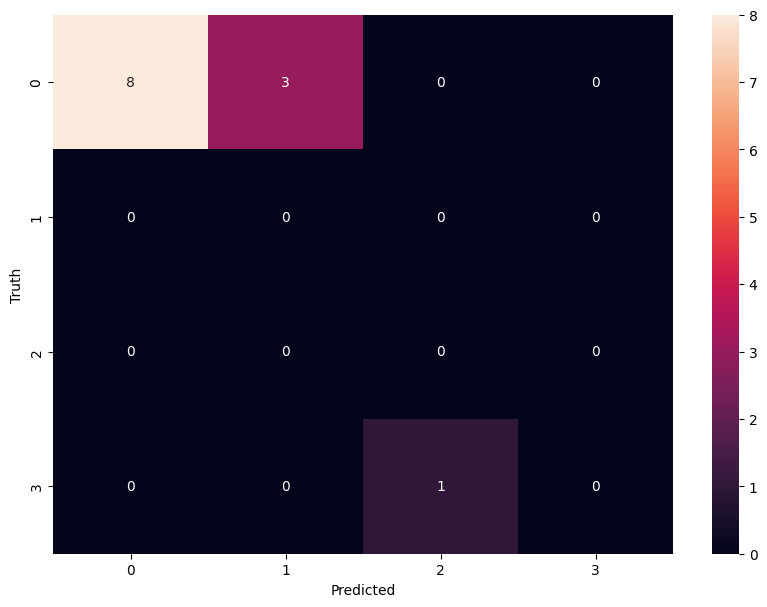

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

# Assuming df is your DataFrame and 'Solar Generation - TWh' is your target variable
X = df_usa.drop('Solar Generation - TWh', axis=1)
y = df_usa['Solar Generation - TWh']

from sklearn.preprocessing import KBinsDiscretizer

# Discretize the target variable into 10 bins
kb = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
y_binned = kb.fit_transform(y.values.reshape(-1, 1))

# Now you can split your data
X_train, X_test, y_train, y_test = train_test_split(X, y_binned, test_size=0.2, random_state=42)

# And apply Multinomial Naive Bayes
mnb = MultinomialNB()
mnb.fit(X_train, y_train.ravel())
y_pred = mnb.predict(X_test)

# Calculate accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')

from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate precision, recall, f1-score, and support
report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(report)

# Plot confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

Accuracy: 0.75
Confusion Matrix:
[[8 1 0 0 0 0]
 [0 0 0 0 0 0]
 [0 1 0 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 1 0]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.89      0.94         9
         1.0       0.00      0.00      0.00         0
         2.0       0.00      0.00      0.00         1
         3.0       1.00      1.00      1.00         1
         7.0       0.00      0.00      0.00         0
         8.0       0.00      0.00      0.00         1

    accuracy                           0.75        12
   macro avg       0.33      0.31      0.32        12
weighted avg       0.83      0.75      0.79        12



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

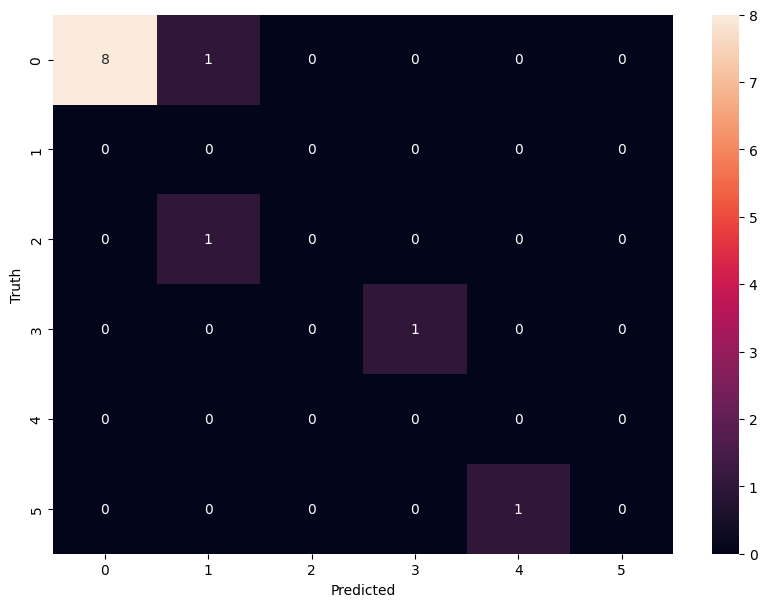

In [ ]:
# Assuming 'Wind Generation - TWh' is your target variable
X = df_usa.drop('Wind Generation - TWh', axis=1)
y = df_usa['Wind Generation - TWh']

from sklearn.preprocessing import KBinsDiscretizer

# Discretize the target variable into 10 bins
kb = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
y_binned = kb.fit_transform(y.values.reshape(-1, 1))

# Now you can split your data
X_train, X_test, y_train, y_test = train_test_split(X, y_binned, test_size=0.2, random_state=42)

# And apply Multinomial Naive Bayes
mnb = MultinomialNB()
mnb.fit(X_train, y_train.ravel())
y_pred = mnb.predict(X_test)


# Calculate accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')


from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate precision, recall, f1-score, and support
report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(report)

# Plot confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

Accuracy: 0.3333333333333333
Confusion Matrix:
[[0 1 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 0 0 1]
 [0 0 0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0 1 0]
 [0 0 1 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         1
         1.0       0.50      1.00      0.67         2
         2.0       0.00      0.00      0.00         0
         3.0       0.00      0.00      0.00         3
         4.0       1.00      1.00      1.00         1
         5.0       0.00      0.00      0.00         2
         7.0       0.00      0.00      0.00         2
         8.0       0.00      0.00      0.00         0
         9.0       0.33      1.00      0.50         1

    accuracy                           0.33        12
   macro avg       0.20      0.33      0.24        12
weighted avg       0.19      0.33      0.24        12



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

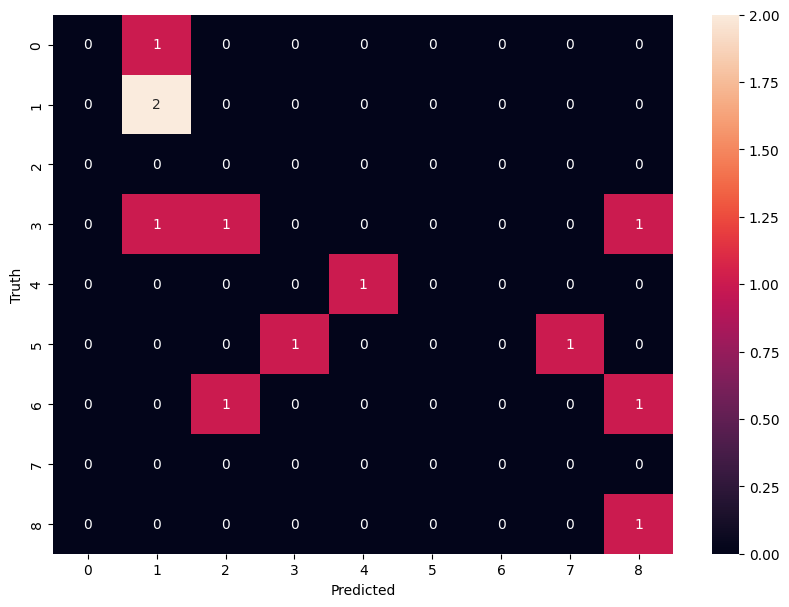

In [ ]:
# Assuming 'Hydro Generation - TWh' is your target variable
X = df_usa.drop('Hydro Generation - TWh', axis=1)
y = df_usa['Hydro Generation - TWh']


# Discretize the target variable into 10 bins
kb = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
y_binned = kb.fit_transform(y.values.reshape(-1, 1))

# Now you can split your data
X_train, X_test, y_train, y_test = train_test_split(X, y_binned, test_size=0.2, random_state=42)

# And apply Multinomial Naive Bayes
mnb = MultinomialNB()
mnb.fit(X_train, y_train.ravel())
y_pred = mnb.predict(X_test)


# Calculate accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')

from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate precision, recall, f1-score, and support
report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(report)

# Plot confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()